# **Install tensorflow for ANN**

In [ ]:
pip install tensorflow

# **Import library and dataset**

In [ ]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from io import BytesIO

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns


file_url = "https://drive.google.com/uc?id=1ZChHCW6n3xR8O4HpruOWxZZ_b48HsVWB"
response = requests.get(file_url)

if response.status_code == 200:
    content = BytesIO(response.content)
    df = pd.read_csv(content)
    print(df.head())
else:
    print("Failed to download the file.")

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

# **Data-Preprocessing**

In [ ]:
#check for dataset attributes and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
#Check for missing values
print(df.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [ ]:
#check for unique values

columns = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

for col in columns:
    unique_values = df[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Teacher_Quality: ['Medium' 'High' 'Low' nan]
Unique values in Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Unique values in Distance_from_Home: ['Near' 'Moderate' 'Far' nan]


In [ ]:
#Changing non integer value to integer using label encoder

le = LabelEncoder()
df['Parental_Involvement'] = le.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources'] = le.fit_transform(df['Access_to_Resources'])
df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df['Motivation_Level'] = le.fit_transform(df['Motivation_Level'])
df['Family_Income'] = le.fit_transform(df['Family_Income'])
df['Teacher_Quality'] = le.fit_transform(df['Teacher_Quality'])
df['School_Type'] = le.fit_transform(df['School_Type'])
df['Peer_Influence'] = le.fit_transform(df['Peer_Influence'])
df['Learning_Disabilities'] = le.fit_transform(df['Learning_Disabilities'])
df['Parental_Education_Level'] = le.fit_transform(df['Parental_Education_Level'])
df['Distance_from_Home'] = le.fit_transform(df['Distance_from_Home'])
df['Internet_Access'] = le.fit_transform(df['Internet_Access'])
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
# Check for missing values
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical

In [ ]:
#Check for datas

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
#Looking for correlation, using correlation matrix with "Exam Score" as the target

df_encoded = pd.get_dummies(df, drop_first=True)
correlation_matrix = df_encoded.corr()
print(correlation_matrix["Exam_Score"].sort_values(ascending=False))


Exam_Score                    1.000000
Attendance                    0.581072
Hours_Studied                 0.445455
Previous_Scores               0.175079
Tutoring_Sessions             0.156525
Peer_Influence                0.100217
Distance_from_Home            0.083944
Extracurricular_Activities    0.064382
Internet_Access               0.051475
Parental_Education_Level      0.040381
Physical_Activity             0.027824
Gender                       -0.002032
School_Type                  -0.008844
Motivation_Level             -0.014910
Sleep_Hours                  -0.017022
Family_Income                -0.026484
Teacher_Quality              -0.061772
Learning_Disabilities        -0.085066
Access_to_Resources          -0.090503
Parental_Involvement         -0.094289
Name: Exam_Score, dtype: float64


In [ ]:
#Check for missing values
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [ ]:
# Define the variable, where X as non-target and Y as target
X = df.drop(columns=['Exam_Score'])  # Select all columns except target (Exam_Score)
y = df['Exam_Score']  # Target (Exam_Score)

# **Neural Network Model**

In [ ]:
#Using minmax scaler for normalize the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the features (X)
X = scaler.fit_transform(X)

# Reshape y to a 2D array and then scale it
# Convert y (a Pandas Series) to a NumPy array, then reshape it
y = scaler.fit_transform(y.values.reshape(-1, 1))


In [ ]:
#split data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the neural network model
model = Sequential()

# Input layer and one hidden layer with 10 neurons and ReLU activation
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

# Add a second hidden layer with 8 neurons
model.add(Dense(8, activation='relu'))

# Output layer with 1 neuron (since we are predicting a continuous value)
model.add(Dense(1, activation='linear'))

# Compile the model with mean squared error loss and Adam optimizer

model.compile(optimizer=Adam(),loss='mean_squared_error',metrics=['mean_squared_error'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 10)                  │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {mse}")

# Making predictions
y_pred = model.predict(X_test)


Epoch 1/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0634 - mean_squared_error: 0.0634 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 2/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 3/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 5/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch 6/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 7/100
529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_los

# **Visualization**

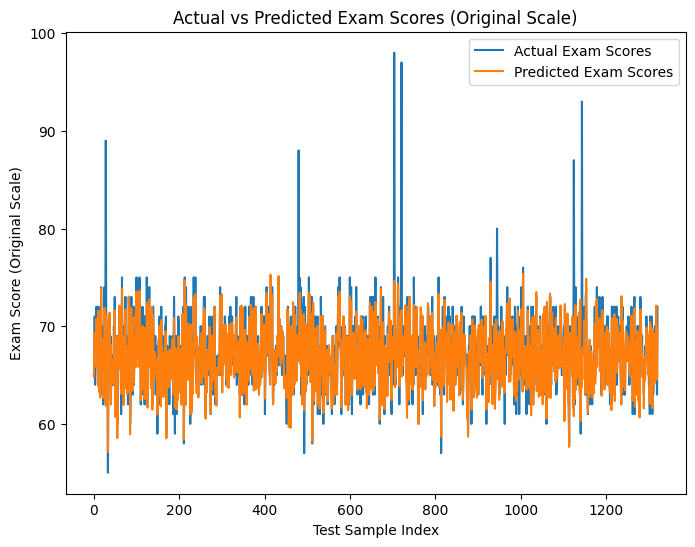

In [ ]:
# Inverse transform the scaled values back to their original scale (0-100)
y_test_original = scaler.inverse_transform(y_test)  # Inverse scaling for y_test
y_pred_original = scaler.inverse_transform(y_pred)  # Inverse scaling for y_pred


#Visualize the model prediction and the actual
plt.figure(figsize=(8, 6))
plt.plot(y_test_original, label='Actual Exam Scores')  # Plot actual exam scores
plt.plot(y_pred_original, label='Predicted Exam Scores')  # Plot predicted exam scores
plt.xlabel('Test Sample Index')
plt.ylabel('Exam Score (Original Scale)')
plt.title('Actual vs Predicted Exam Scores (Original Scale)')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)* 100
print(f"Mean Absolute Error on Test Data: {mae}")

Mean Absolute Error on Test Data: 2.294936748129015


In [ ]:
from sklearn.metrics import  mean_squared_error

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)*100
print(f"Mean Squared Error (MSE) on Test Data: {mse}")



Mean Squared Error (MSE) on Test Data: 0.2139431409168562
